<a href="https://colab.research.google.com/github/DanRelief/Bank-System/blob/main/Relatorio_Sensor_BLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
dataset= pd.read_csv('rms_data_11_47_27_08_2025.csv')
dataset['time'] = dataset['time'] - dataset['time'][0]


# Introdução

Implementação em firmware do sensor SMQ985 versão 6.2, com objetivo de viabilizar a transmissão de dados via BLE.

# Objetivo

Transmitir valores de RMS, temperatura e validar se valor é suficiente para considerar veículo ligado ou desligado via advertise BLE.

### Sensores utilizados

|Sensor ID|Versão de hardware|Firmware|
|---------------|------------------|--------|
|68470|SMQ985 6.2| 3.1.1 |
|98320|SMQ985 6.2| 3.1.1 |
|69069|SMQ985 6.2| SMQ985/branches/BLE_BROADCAST_DANIEL revision 1099 |
|68356|SMQ985 6.2| SMQ985/branches/BLE_BROADCAST_DANIEL revision 1099 |


In [ ]:
"""from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['rms_value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('rms_value', ascending=True)
_plot_series(df_sorted, '')

sns.despine(fig=fig, ax=ax)
plt.xlabel('amostra')
_ = plt.ylabel('rms')"""

"from matplotlib import pyplot as plt\nimport seaborn as sns\n\ndef _plot_series(series, series_name, series_index=0):\n  palette = list(sns.palettes.mpl_palette('Dark2'))\n  xs = series['time']\n  ys = series['rms_value']\n\n  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])\n\nfig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')\ndf_sorted = dataset.sort_values('rms_value', ascending=True)\n_plot_series(df_sorted, '')\n\nsns.despine(fig=fig, ax=ax)\nplt.xlabel('amostra')\n_ = plt.ylabel('rms')"

In [ ]:
"""dataset.set_index('Amostra').plot();"""

"dataset.set_index('Amostra').plot();"

### Sensores Parados

In [ ]:
"""def fazer_grafico(nome_arquivo, titulo):
    dataset= pd.read_csv("rms_data_11_29_27_08_2025.csv")
    dataset['time'] = dataset['time'] - dataset['time'][0]

    fig, ax = plt.subplot s(1,1, figsize = (13, 3), layout='constrained')

    ax.plot(dataset['time'], dataset['rms_value'])

    media = dataset['rms_value'].mean()
    valor_max = dataset['rms_value'].max()

    plt.axhline(media, color='red', label='Média', linestyle='--')
    plt.axhline(valor_max, label='Valor máximo parado', linestyle='--', color='blue')

    ax.legend(['RMS', f"Média: {media:.4f}", f"Valor máximo: {valor_max:.4f}"], loc='lower right')

    plt.ylabel("RMS [g]")
    plt.xlabel(' [s]')
    plt.title(titulo)
    plt.show()"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def fazer_graficos(nome_arquivo, titulo):
    dataset = pd.read_csv(nome_arquivo)

    fig, axs = plt.subplots(3, 1, figsize=(13, 9), layout="constrained")

    # ================== RMS ==================
    axs[0].plot(dataset.index, dataset['rms_value'], marker='', color='black')
    media = dataset['rms_value'].mean()
    valor_max = dataset['rms_value'].max()
    axs[0].axhline(media, color='red', label=f"Média: {media:.3f}", linestyle='--')
    axs[0].axhline(valor_max, color='blue', label=f"Máximo: {valor_max:.3f}", linestyle='--')
    axs[0].set_ylabel("RMS [g]")
    axs[0].set_title("RMS")
    axs[0].legend(loc='lower right')
    axs[0].set_ylim([dataset['rms_value'].min() - 0.001, dataset['rms_value'].max() + 0.001])

    # ================== Temperatura ==================
    axs[1].plot(dataset.index, dataset['temperature'], marker='', color='orange')
    media_temp = dataset['temperature'].mean()
    axs[1].axhline(media_temp, color='red', linestyle='--', label=f"Média: {media_temp:.2f}")
    axs[1].set_ylabel("Temperatura [°C]")
    axs[1].set_title("Temperatura")
    axs[1].legend(loc='lower right')

    # ================== Status ==================
    axs[2].plot(dataset.index, dataset['status'], marker='o', linestyle='-', color='green')
    axs[2].set_ylabel("Status")
    axs[2].set_xlabel("Número da Amostra")
    axs[2].set_title("Status")

    fig.suptitle(titulo, fontsize=14, fontweight='bold')
    plt.show()



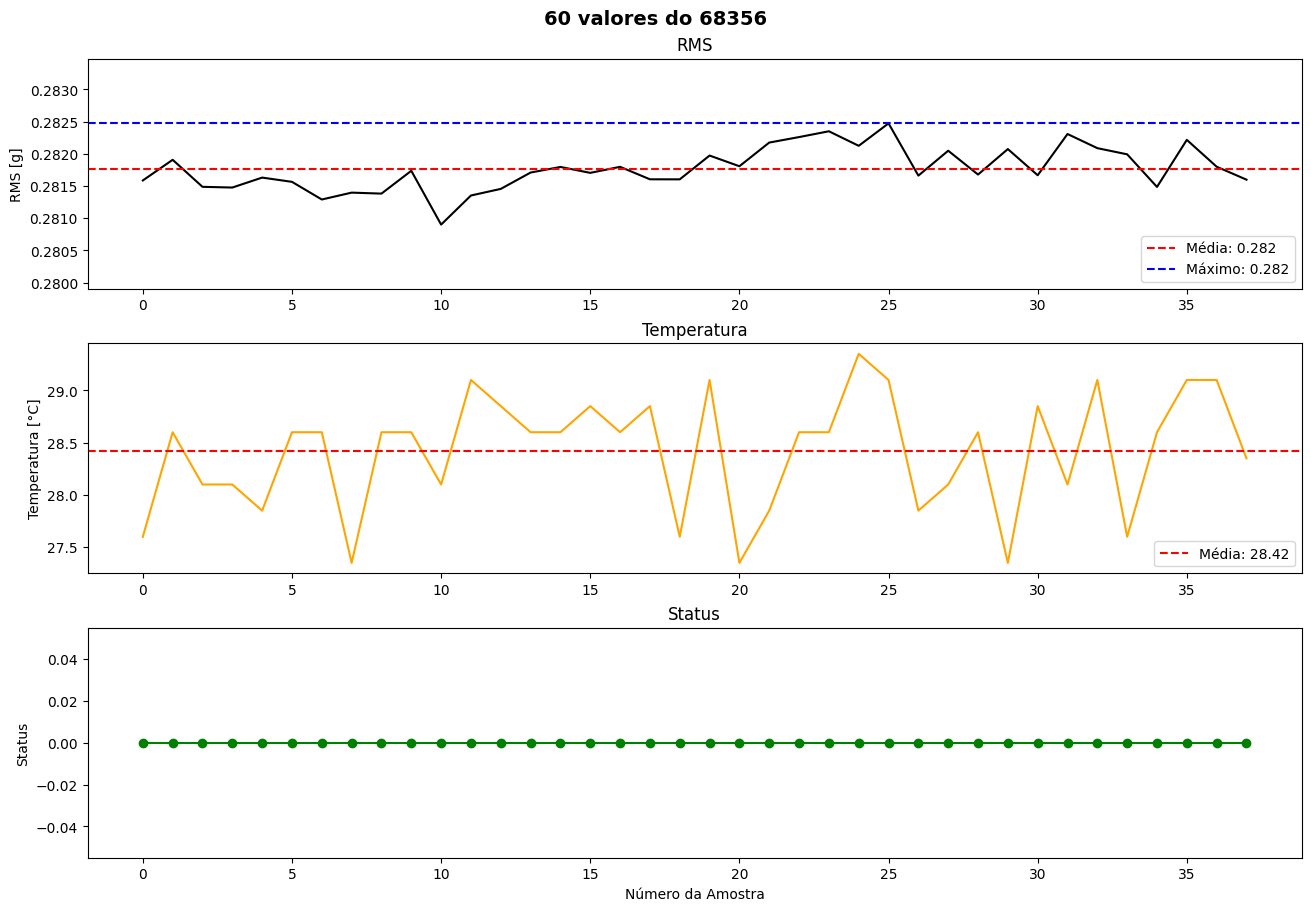

In [ ]:
fazer_graficos('Amostra 68356 25600.csv', '60 valores do 68356')

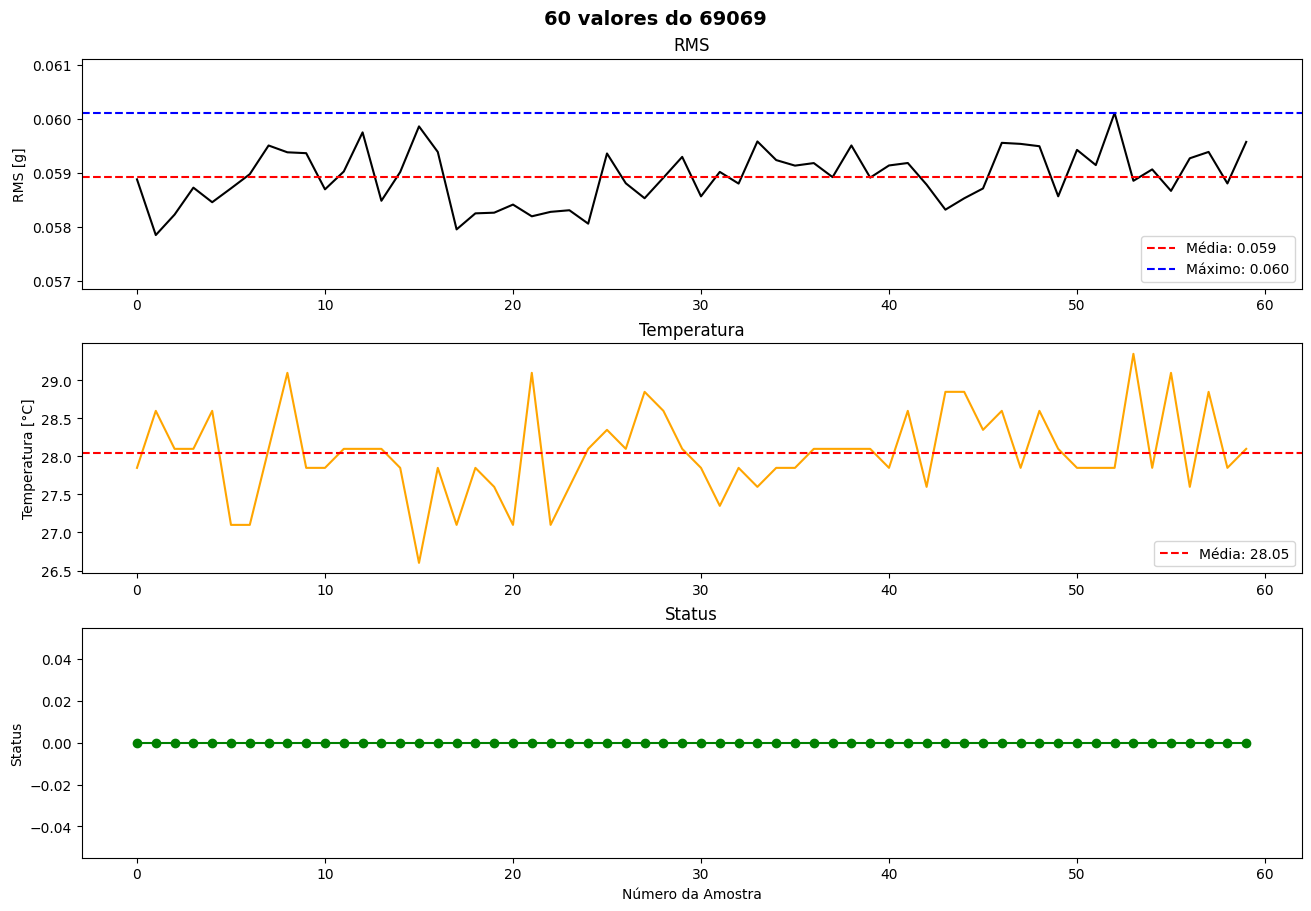

In [ ]:
fazer_graficos('Amostra 69069 25600.csv', '60 valores do 69069')

### Gráficos com ODR 800Hz e 800 amostras

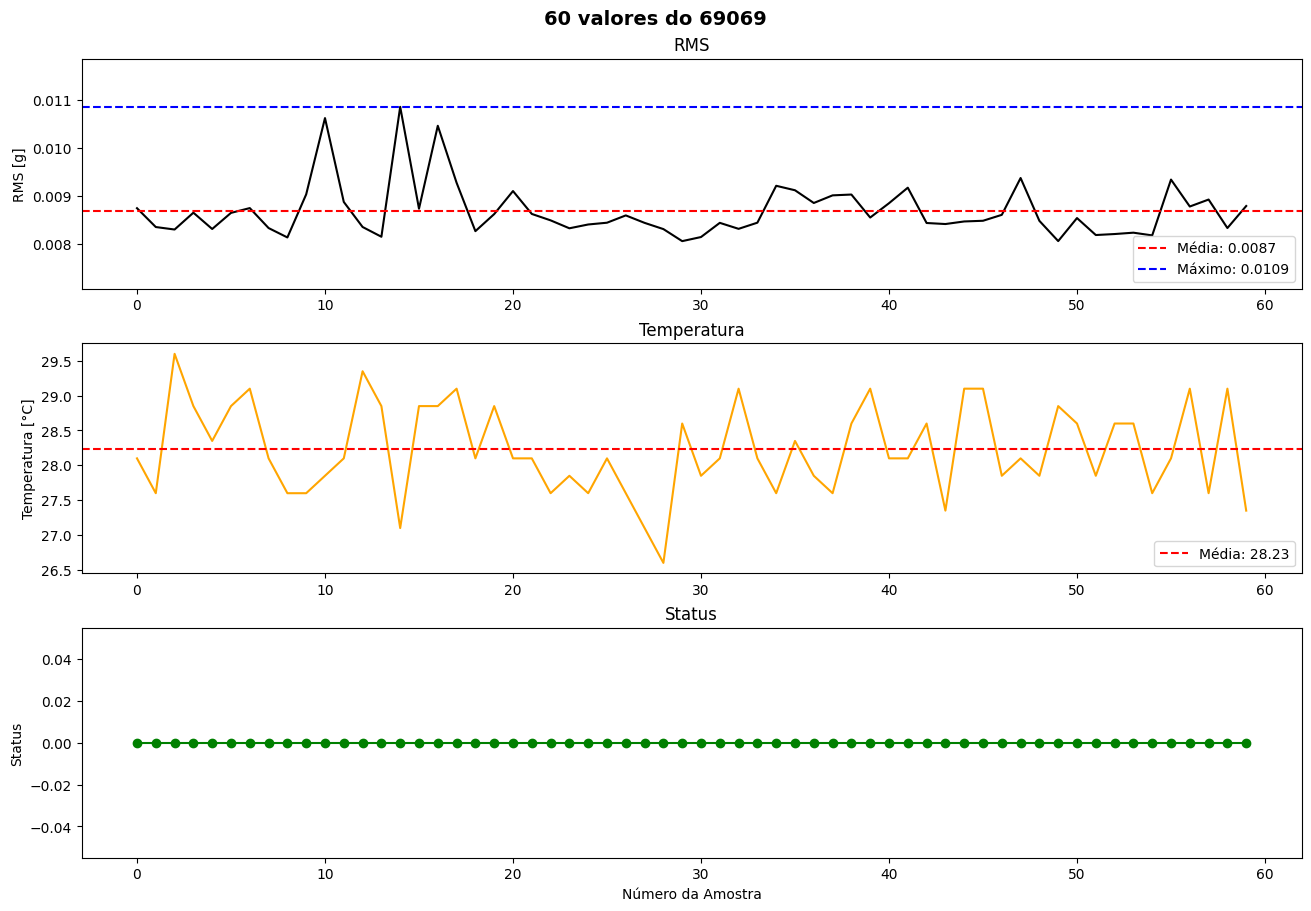

In [ ]:
fazer_graficos('Amostra 69069 800.csv', '60 valores do 69069')

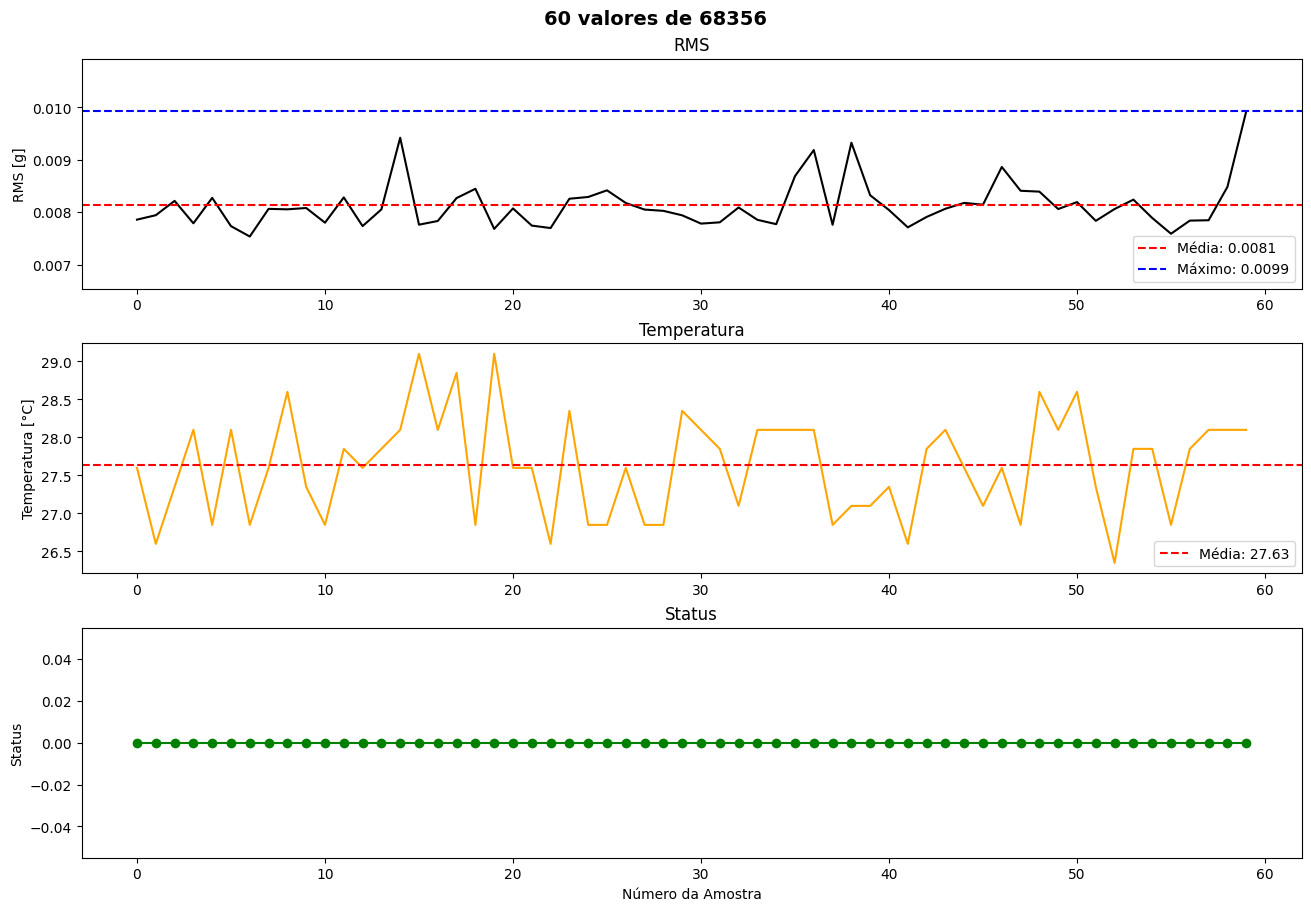

In [ ]:
fazer_graficos('Amostra 68356 800.csv', '60 valores de 68356')

### Sensores instalados em motor bom e sem carga  

### Sensores em algum carro. Neutro e andando

# Conclusão  

A partir dos testes, pode-se definir empiricamente o valor para o sensor parado de XXXX